# Data Mining Lab6 - Sampling and SMOTE
# First part, introduction to Sampling
#### Data Mining Spring 2022, UVic
### numpy.random()

In [5]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

### Sampling from a Unifrom distribution [0,1)

In [2]:
np.random.sample()

0.3911916646733413

Uniform sampling between [l,h) interval

In [3]:
l = 3
h = 7
(h-l) * np.random.sample() + l

5.237505590020749

Sampling multiple points

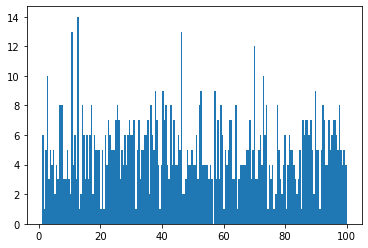

In [8]:
np.random.seed(0)
n = 1000
l = 1
h = 100
samples = (h-l) * np.random.sample(n) + l
plt.hist(samples,bins = 200)
plt.show()

Alternatively, you can call np.random.rand() function

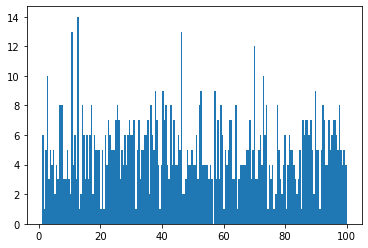

In [9]:
np.random.seed(0)
h =100
l = 1
samples = (h-l) * np.random.rand(1000) + l
plt.hist(samples,bins=200)
plt.show()

### Sampling from well-known distributions
#### Normal Distrubtion: numpy.random.normal(loc=0.0, scale=1.0, size=None) loc = mean, scale = standard deviation
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

<AxesSubplot:ylabel='Density'>

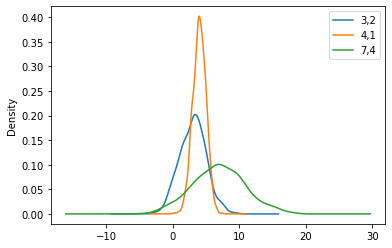

In [11]:
import pandas as pd
n = 1000
samples = np.random.randn(n,1)
samples1 = np.random.normal(3,2,1000)
samples2 = np.random.normal(4,1,1000)
samples3 = np.random.normal(7,4,1000)
df = pd.DataFrame({'3,2':samples1 , '4,1':samples2 , '7,4':samples3})
df.plot.density()

### Sampling Beta Distribution
### np.random.beta(a, b, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html
$$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1-x) ^{\beta -1}$$
Where the normalization $B$ is the Beta function:
$$B(\alpha, \beta) = \int_{0}^{1} t^{\alpha-1}(1-t)^{\beta - 1}dt$$.


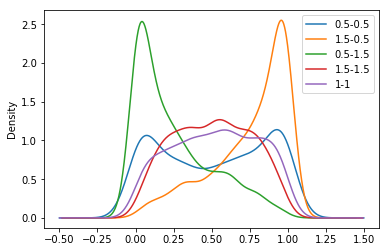

In [7]:
betaSamples1 = np.random.beta(0.5,0.5,1000)
betaSamples2 = np.random.beta(1.5,0.5,1000)
betaSamples3 = np.random.beta(0.5,1.5,1000)
betaSamples4 = np.random.beta(1.5,1.5,1000)
betaSamples5 = np.random.beta(1,1,1000)

dfBeta = pd.DataFrame({'0.5-0.5':betaSamples1, '1.5-0.5':betaSamples2 
                       , '0.5-1.5': betaSamples3 , '1.5-1.5': betaSamples4, '1-1': betaSamples5 })
dfBeta.plot.density()

## Sampling Binomial Distribution
### numpy.random.binomial(n, p, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
$$P(N) = {n \choose N} p^N (1-p)^{n-N}$$

<AxesSubplot:ylabel='Frequency'>

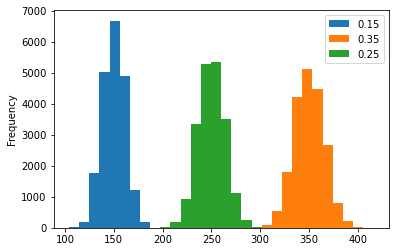

In [14]:
n = 1000
binomSample1 = np.random.binomial(n,0.15,20000)
binomSample2 = np.random.binomial(n,0.35,20000)
binomSample3 = np.random.binomial(n,0.25,20000)
dfBinom = pd.DataFrame({'0.15': binomSample1 , '0.35': binomSample2 ,'0.25':binomSample3})
# dfBinom.plot.density()
dfBinom.plot.hist(bins = 30)

## Others
### Dirichlet, chisquare, exponential, gamma, geometric, ... by using numpy.random.chisquare  etc
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html

## Sampling from Discrete Collections
### numpy.random.randint(low, high=None, size=None)
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [9]:
low = 3
high = 11
samples = np.random.randint(low,high,(10,2))
print(samples.shape)
print(samples)

(10, 2)
[[ 6  7]
 [ 3  9]
 [ 3 10]
 [ 3  9]
 [ 9 10]
 [10  5]
 [ 4  3]
 [ 8  7]
 [ 6  5]
 [10  4]]


We can also sample from a discrete set by using <b>numpy.random.choice()</b>
#### https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [10]:
# Generate a list of integers from 1 to 99:
iList = np.arange(1,100,1)   # start, stop, step
k = 20
np.random.choice(iList, size=k,replace=False) 

array([47, 59, 11, 83, 36, 67, 65, 69, 96, 84, 44, 40, 19, 52, 42, 46, 68,
       56, 75, 41])

### Sampling over non-unifrom distribution
#### https://numpy.org/doc/stable/reference/generated/numpy.unique.html

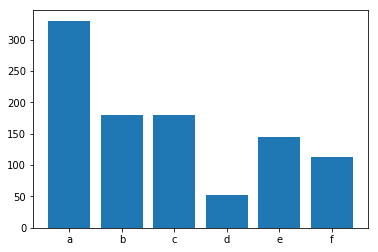

In [11]:
p = [0.3, 0.2, 0.2, 0.05, 0.15, 0.1]   # probability must sum to 1.
k = 1000
cList = ['a', 'b', 'c', 'd', 'e', 'f']
cSamp = np.random.choice(cList, size=k, p=p) 
label, counts = np.unique(cSamp, return_counts=True)
plt.bar(label, counts)
plt.show()

### Random Variables
Let's use a dice game for illustration.
Roll two dice, take the sum. 

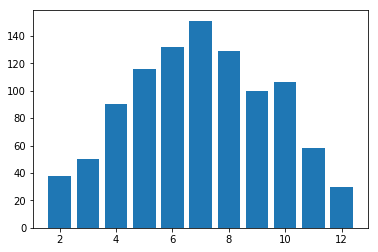

In [12]:
dice = [1,2,3,4,5,6]
k = 1000
roll1 = np.random.choice(dice, size=k) # fair dice
roll2 = np.random.choice(dice, size=k) # fair dice
sumD = roll1 + roll2
label, counts = np.unique(sumD, return_counts=True)
plt.bar(label, counts)
plt.show()

## Data Sampling

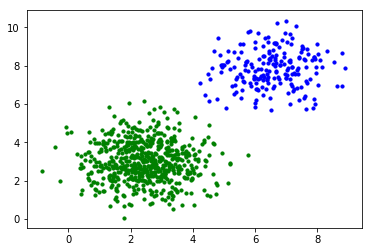

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
numSamples = [600,200]
samples,labels = make_blobs(n_samples=numSamples, 
                             centers=([2.5, 3], [6.7, 7.9]))

colours = ('green', 'blue')

fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=10)

(40, 2)
(40,)
Data sampling: 30 green points (original:600) and 10 blue points (original:200)


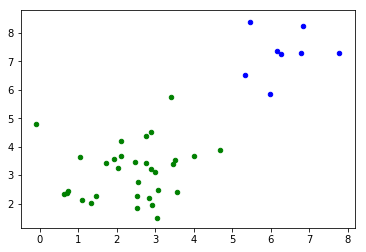

In [14]:
idx = np.arange(len(samples))
s = np.random.choice(idx, size=int(len(samples)/20), replace=False)
sampledPts = samples[s]
sampledLables = np.array(labels[s])
print(sampledPts.shape)
print(sampledLables.shape)
print("Data sampling: 30 green points (original:600) and 10 blue points (original:200)")
colours = ('green', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(sampledPts[sampledLables==n_class][:, 0], sampledPts[sampledLables==n_class][:, 1]
               ,c=colours[n_class],s=20)

# Second Part - Handling imbalanced data
* It happens when the observation of one class is much higher or lower than the other class
    * Anomally Detection, Fraud Detection, etc
    * https://www.kaggle.com/qianchao/smote-with-imbalance-data
* Standard ML techniques have a bias towards the **majority** class, and they tend to ignore the minority class.
* 5 kinds of techniques: https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html

## SMOTE (Synthetic Minority Over-sampling Technique)
* SMOTE first selects a minority class instance 'a' at random and finds its K-Nearest minority class neighbors. The synthetic instance is then created by choosing one of the K-nearest Neighbors 'b' at random and connecting 'a' and 'b' to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances: 'a' and 'b'.
 (Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.)
* The combination of SMOTE and under-sampling performs better than plain under-sampling.
 (SMOTE: Synthetic Minority Over-sampling Technique, 2011.)
### SMOTE paper: https://arxiv.org/pdf/1106.1813.pdf
### Instructions for installing SMOTE imbalanced learning library within sci-kit learn: https://github.com/scikit-learn-contrib/imbalanced-learn

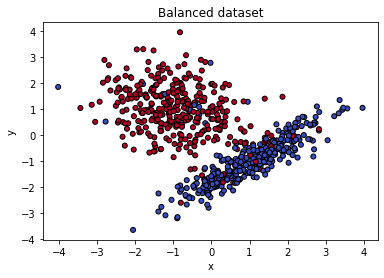

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
seed = 100

# create balanced dataset
X1, Y1 = make_classification(n_samples=700, n_features=2, n_redundant=0,
                            n_informative=2, n_clusters_per_class=1,
                            class_sep=1.0, flip_y=0.06, random_state=seed)

plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()
# concatenate the features and labels into one dataframe
df = pd.concat([pd.DataFrame(X1), pd.DataFrame(Y1)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
# save the dataset because we'll use it later
df.to_csv('df_base.csv', index=False, encoding='utf-8')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 



def train_SVM(df):
    # select the feature columns
    X = df.loc[:, df.columns != 'label']
    # select the label column
    y = df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 


    # train an SVM with linear kernel
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    return clf,X_test,y_test


def plot_svm_boundary(clf, df, title):
   fig, ax = plt.subplots()
   X0, X1 = df.iloc[:, 0], df.iloc[:, 1]

   x_min, x_max = X0.min() - 1, X0.max() + 1
   y_min, y_max = X1.min() - 1, X1.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

   ax.scatter(X0, X1, c=df.label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_ylabel('y')
   ax.set_xlabel('x')
   ax.set_title(title)
   plt.show()


[[97 11]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       108
           1       0.90      0.95      0.92       102

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.92      0.92       210



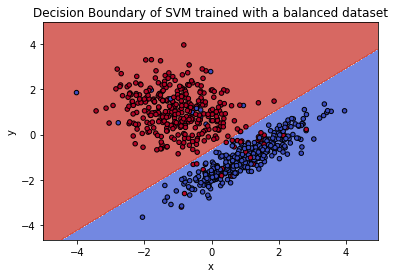

In [3]:
df = pd.read_csv('df_base.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a balanced dataset')

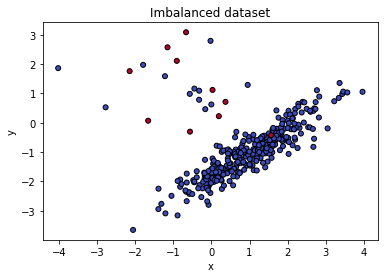

In [4]:
import imblearn
from imblearn.datasets import make_imbalance
X_res , y_res = make_imbalance(X1, Y1, sampling_strategy={0: 340, 1: 10}, random_state=seed)
plt.title('Imbalanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()


df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_imbalanced.csv', index=False, encoding='utf-8')

[[102   3]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.00      0.00      0.00         0

    accuracy                           0.97       105
   macro avg       0.50      0.49      0.49       105
weighted avg       1.00      0.97      0.99       105



C:\Users\manhq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manhq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manhq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


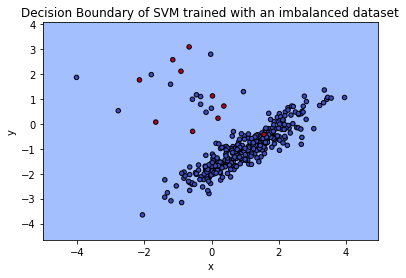

In [5]:
df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
clf,X_test,y_test = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with an imbalanced dataset')

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


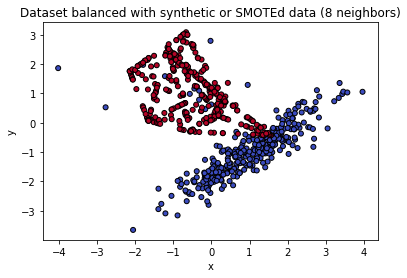

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('df_imbalanced.csv', encoding='utf-8', engine='python')
X = df.loc[:, df.columns != 'label']
y = df.label
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
print(type(X_res))
X_res1 = np.asarray(X_res)
print(type(X_res1))
y_res1 = np.asarray(y_res)
plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_res1[:, 0], X_res1[:, 1], marker='o', c=y_res1, s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['feature_1', 'feature_2', 'label']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

[[99  0]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.50      0.67         6

    accuracy                           0.97       105
   macro avg       0.99      0.75      0.83       105
weighted avg       0.97      0.97      0.97       105



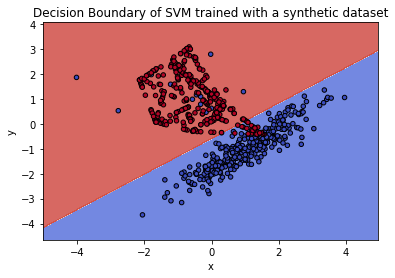

In [16]:
df = pd.read_csv('df_smoted.csv', encoding='utf-8', engine='python')
clf,X_test_temp,y_test_temp = train_SVM(df)
Predictoin = clf.predict(X_test)
print(confusion_matrix(Predictoin,y_test))
print(classification_report(Predictoin,y_test))
plot_svm_boundary(clf, df, 'Decision Boundary of SVM trained with a synthetic dataset')

## Under Sampling Technique 
* It remove samples from the majority class which are closer to the minority class samples
* This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper (Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.), it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.
* A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.
* Check for removing the downside of SMOTE. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/